## 6.1.4 Generate Random Latitudes and Longitudes
    

In [37]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [38]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [39]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [40]:
from citipy import citipy


In [41]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    

50.404884951766775 14.369950815583394
-63.0694737512662 -147.9308485364038
-33.25938509158014 -50.59486842268123
74.70492052804829 43.828820565721486
57.400056074859805 -36.454124596234266
33.75333229167697 -141.1040649125087
40.91482044453875 -101.60132565630059
-15.035228743265549 -110.43985552630589
69.07350960233592 0.8603841624958477
-46.199816071914945 -76.64256374748895
-48.675919788819485 -90.18733727867237
25.708884775453214 53.452153694880394
14.850964323511747 -76.61469583776156
56.53605429353232 -125.08971041299733
35.423563185495425 -25.065711566434544
30.128713525447537 -31.224684083841424
55.781396799699905 178.97658628814497
-47.40490503551509 144.88528446937863
-45.896422872930685 -10.91934850057794
81.7711454051344 163.86070602075398
-13.9590093394701 93.48303544451892
-3.352814735366664 -57.04150123439898
55.58745359696144 -33.647557255732124
6.8397582159454515 -172.7480289655371
24.08024843292459 156.07786181783263
72.18024713933585 51.534696018123896
30.76067938767

84.65332622154139 7.845628929991449
-57.71269523058475 -173.4868225656838
37.14126229025305 75.90116068509198
-70.84039021322859 -97.58829078255634
34.43069523599415 -121.99936159897916
-5.28322446267326 48.09477635663674
-18.413637074784248 -15.586545367361822
-54.83032360072683 -5.3651836893798475
-57.85369574128022 -20.464021822788055
-73.64819132901935 41.45661505049051
25.514182641929906 31.914352664927264
-57.15312692709136 -101.87183895199199
80.76769168562265 -24.632968866566785
75.82445429985967 -27.374726186924136
3.5055784640407524 -99.91585998484906
54.49455040307967 128.7962262788655
-42.51465834076924 67.94058737088145
-31.55475899375888 99.79861231687897
1.4846811725528397 22.824281457291477
-28.20698731067035 -4.493429071875283
78.45488528470707 149.61529276599492
38.764075844982045 133.8657243760269
2.215803404269238 168.56308144752353
-0.6549367094164467 3.6164625482287533
54.613034724442855 -21.026964958684545
39.491089757658415 5.688717935228169
-80.984598200698 -12

## 6.1.5 Generate Random World Cities


In [42]:
# Import citypy Module
from citipy import citipy


In [43]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


634

## 6.2.1 - 6.2.5

### See API_practice.ipynb

## 6.2.6 Get the City Weather Data

### Import Dependencies, and Initialize an Empty List and Counters

In [44]:
# Module work from here is in the WeatherPy.ipynb file

In [45]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Cll.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [46]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [47]:
### Loop Through the List of Cities and Build the City URL

In [48]:
%%script false --no-raise-error

# **** TESING ****
# while testing, turn this cell off with the above command
# to reduce the calls to the API now that we have data for
# for charts below
#

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | steti
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | north platte
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | raudeberg
Processing Record 10 of Set 1 | coihaique
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | abu dhabi
Processing Record 13 of Set 1 | morant bay
Processing Record 14 of Set 1 | fort saint james
Processing Record 15 of Set 1 | vila franca do campo
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | beringovskiy
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | barreirinha
P

Processing Record 35 of Set 4 | kushima
Processing Record 36 of Set 4 | namatanai
Processing Record 37 of Set 4 | coahuayana
Processing Record 38 of Set 4 | shenjiamen
Processing Record 39 of Set 4 | acapulco
Processing Record 40 of Set 4 | okha
Processing Record 41 of Set 4 | vanimo
Processing Record 42 of Set 4 | nakhon nayok
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | kargopol
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | iracoubo
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | clement town
Processing Record 49 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | mabaruma
Processing Record 2 of Set 5 | viedma
Processing Record 3 of Set 5 | forset
City not found. Skipping...
Processing Record 4 of Set 5 | manoel urbano
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | seydi
Processing Record 7 of Set 5 | kant


Processing Record 27 of Set 8 | eureka
Processing Record 28 of Set 8 | sioux lookout
Processing Record 29 of Set 8 | shimoda
Processing Record 30 of Set 8 | mugla
Processing Record 31 of Set 8 | khilok
Processing Record 32 of Set 8 | oranjestad
Processing Record 33 of Set 8 | narsaq
Processing Record 34 of Set 8 | port hedland
Processing Record 35 of Set 8 | lasa
Processing Record 36 of Set 8 | kencong
Processing Record 37 of Set 8 | terrace
Processing Record 38 of Set 8 | moscow
Processing Record 39 of Set 8 | srednekolymsk
Processing Record 40 of Set 8 | abu samrah
Processing Record 41 of Set 8 | areosa
Processing Record 42 of Set 8 | mrirt
City not found. Skipping...
Processing Record 43 of Set 8 | usevya
Processing Record 44 of Set 8 | finnsnes
Processing Record 45 of Set 8 | half moon bay
Processing Record 46 of Set 8 | broome
Processing Record 47 of Set 8 | sakakah
Processing Record 48 of Set 8 | salym
Processing Record 49 of Set 8 | cockburn harbour
City not found. Skipping...
P

Processing Record 14 of Set 12 | slidell
Processing Record 15 of Set 12 | walla walla
Processing Record 16 of Set 12 | sernur
Processing Record 17 of Set 12 | ciudad bolivar
Processing Record 18 of Set 12 | khani
Processing Record 19 of Set 12 | khor
Processing Record 20 of Set 12 | penaflor
Processing Record 21 of Set 12 | santa helena de goias
Processing Record 22 of Set 12 | alice springs
Processing Record 23 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 24 of Set 12 | christchurch
Processing Record 25 of Set 12 | ugoofaaru
Processing Record 26 of Set 12 | dolores
Processing Record 27 of Set 12 | villa hayes
Processing Record 28 of Set 12 | nekhayevskiy
Processing Record 29 of Set 12 | russell
Processing Record 30 of Set 12 | banda aceh
Processing Record 31 of Set 12 | garowe
Processing Record 32 of Set 12 | sobolevo
Processing Record 33 of Set 12 | eskisehir
Processing Record 34 of Set 12 | fort nelson
Processing Record 35 of Set 12 | ponca city
Processing Reco

In [49]:
len(city_data)


582

## 6.2.7 Create a DataFrame of City Weather Data

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Steti,50.4530,14.3742,61.65,91,99,4.72,CZ,2022-09-06 03:25:09
1,Mataura,-46.1927,168.8643,41.49,85,98,7.90,NZ,2022-09-06 03:25:09
2,Rio Grande,-32.0350,-52.0986,55.94,90,4,11.16,BR,2022-09-06 03:23:11
3,Ostrovnoy,68.0531,39.5131,46.74,87,100,12.71,RU,2022-09-06 03:25:09
4,Tasiilaq,65.6145,-37.6368,39.36,93,93,6.62,GL,2022-09-06 03:25:10
5,Fortuna,40.5982,-124.1573,60.35,86,7,3.78,US,2022-09-06 03:25:10
6,North Platte,41.1239,-100.7654,79.12,36,1,10.00,US,2022-09-06 03:22:06
7,Puerto Ayora,-0.7393,-90.3518,67.55,98,95,5.99,EC,2022-09-06 03:25:11
8,Raudeberg,61.9875,5.1352,52.95,65,24,6.02,NO,2022-09-06 03:25:11
9,Coihaique,-45.5752,-72.0662,41.61,93,100,3.44,CL,2022-09-06 03:21:01


In [51]:
new_column_order = [
    "City", "Country", "Date", 
    "Lat", "Lng", "Max Temp", 
    "Humidity", "Cloudiness", "Wind Speed"
]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Steti,CZ,2022-09-06 03:25:09,50.4530,14.3742,61.65,91,99,4.72
1,Mataura,NZ,2022-09-06 03:25:09,-46.1927,168.8643,41.49,85,98,7.90
2,Rio Grande,BR,2022-09-06 03:23:11,-32.0350,-52.0986,55.94,90,4,11.16
3,Ostrovnoy,RU,2022-09-06 03:25:09,68.0531,39.5131,46.74,87,100,12.71
4,Tasiilaq,GL,2022-09-06 03:25:10,65.6145,-37.6368,39.36,93,93,6.62
5,Fortuna,US,2022-09-06 03:25:10,40.5982,-124.1573,60.35,86,7,3.78
6,North Platte,US,2022-09-06 03:22:06,41.1239,-100.7654,79.12,36,1,10.00
7,Puerto Ayora,EC,2022-09-06 03:25:11,-0.7393,-90.3518,67.55,98,95,5.99
8,Raudeberg,NO,2022-09-06 03:25:11,61.9875,5.1352,52.95,65,24,6.02
9,Coihaique,CL,2022-09-06 03:21:01,-45.5752,-72.0662,41.61,93,100,3.44


In [52]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## 6.3.1 Plot Latitude vs. Temperature
### Get Data for Plotting

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


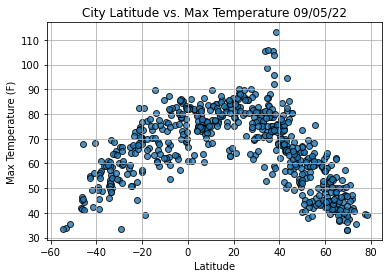

In [33]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


## 6.3.2 Plot Latitude vs. Humidity

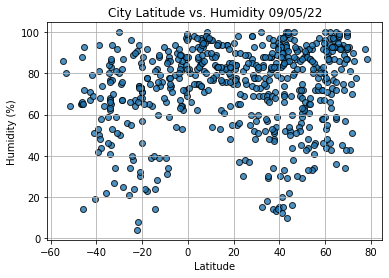

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


## 6.3.3 Plot Latitude vs. Cloudiness

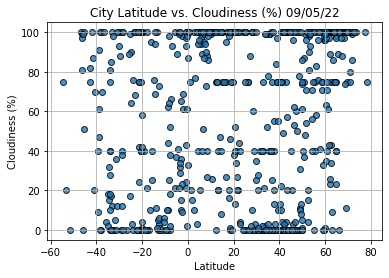

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


## 6.3.4 Plot Latitude vs. Wind Speed

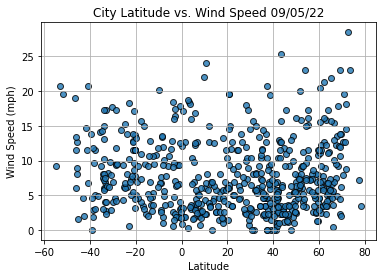

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()
